<a href="https://colab.research.google.com/github/octady/Student_Performance_Analyze/blob/main/Student_Performance_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analyst: Student Performance Factors Dataset**

**Link Dashboard:** https://studentperformanceanalyze-octady.streamlit.app/

**Link Github:** https://github.com/octady/Student_Performance_Analyze.git

**Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Data Wrangling**

**Assign dataset that will be used**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudentPerformanceFactors.csv')
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


**Data Assesment**

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Here I will only use a few columns to perform data analysis, so I will delete the columns that I don't use.

In [10]:
# Langkah 1: Tentukan kolom yang ingin digunakan
kolom_yang_digunakan = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']  # Ganti dengan nama kolom yang akan digunakan

# Langkah 2: Hapus kolom yang tidak diperlukan
df = df[kolom_yang_digunakan]

# Langkah 3: Tampilkan dataset setelah kolom yang tidak diperlukan dihapus
print(df.head())

   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  Exam_Score  
0                  3          67  
1                  4          61  
2                  4          74  
3                  4          71  
4                  4          70  


**Data Availability Checking**

In [6]:
print(df.isnull().sum())

Hours_Studied        0
Attendance           0
Sleep_Hours          0
Previous_Scores      0
Tutoring_Sessions    0
Physical_Activity    0
Exam_Score           0
dtype: int64


In [7]:
#duplicate
print(df.duplicated().sum())

1


**Data Cleaning**

Action: there are 1 duplicate was found but no null values were detected, data cleaning is required. The duplicate will be removed to ensure data integrity.

In [8]:
df = df.drop_duplicates()

In [9]:
print(df.duplicated().sum())

0


data has been cleaned

Then, I encode the data to ensure it can be used by machine learning models that require numeric input.

# **Descriptive Statistics**

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6606.0,19.975931,5.990848,1.0,16.0,20.0,24.0,44.0
Attendance,6606.0,79.979413,11.547245,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6606.0,7.028913,1.468183,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6606.0,75.067060,14.398110,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6606.0,1.493945,1.230526,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6606.0,2.967605,1.031309,0.0,2.0,3.0,4.0,6.0
Exam_Score,6606.0,67.236300,3.890401,55.0,65.0,67.0,69.0,101.0


In [13]:
for col in df:
    print(df[col].value_counts())
    print('----------------------------')

Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    350
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
6      17
4      17
3      12
36     11
38      7
39      7
37      6
2       6
1       3
43      1
44      1
Name: count, dtype: int64
----------------------------
Attendance
67     189
98     187
76     185
77     184
64     182
94     180
84     175
79     175
91     175
82     173
68     170
69     170
80     169
81     168
96     168
73     168
93     167
72     167
74     165
78     165
61     164
95     163
89     162
71     162
97     161
70     161
65     158
83     157
90     156
88     155
63     155
99     154
92     154
62     152
86     151
87     151
75     149
85     146
66     145
60      87
100     81
Name: count, dtype: int64
----------------------------
Slee

# **Exploratory Data Analysis & Data Visualization**

In [15]:
df.describe(include="all")

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6606.000000,6606.000000,6606.000000,6606.00000,6606.000000,6606.000000,6606.000000
mean,19.975931,79.979413,7.028913,75.06706,1.493945,2.967605,67.236300
std,5.990848,11.547245,1.468183,14.39811,1.230526,1.031309,3.890401
min,1.000000,60.000000,4.000000,50.00000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.00000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.00000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.00000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.00000,8.000000,6.000000,101.000000


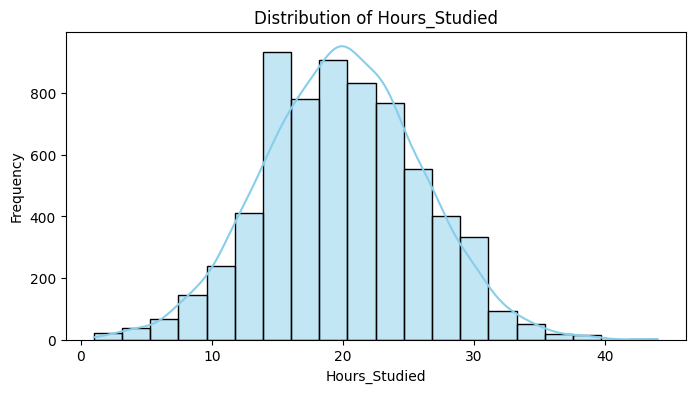

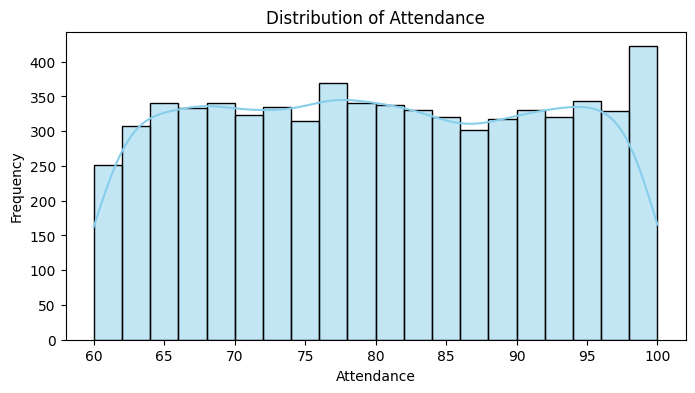

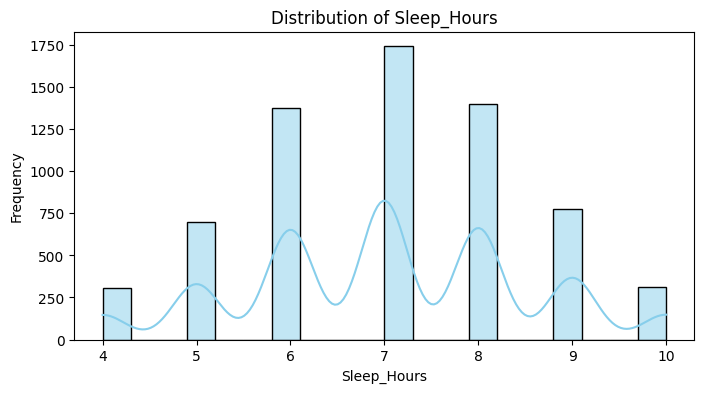

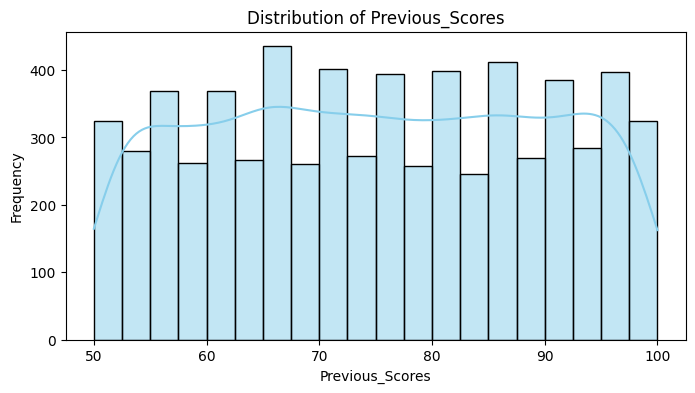

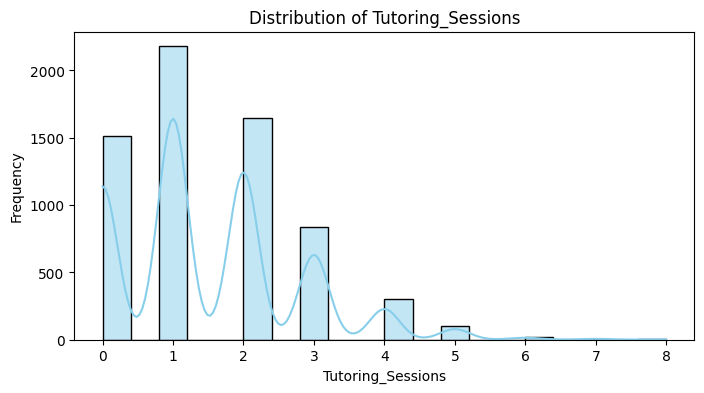

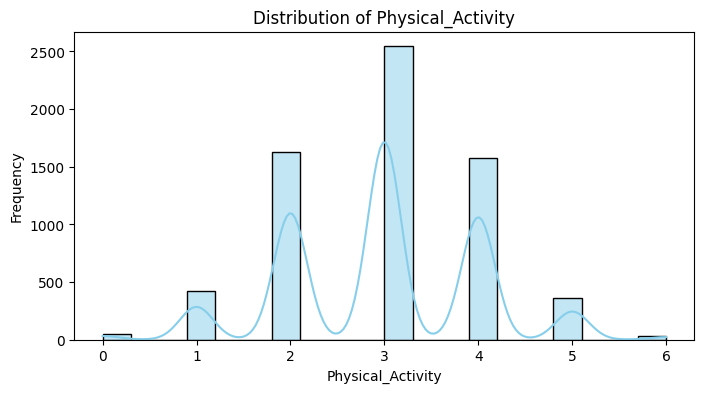

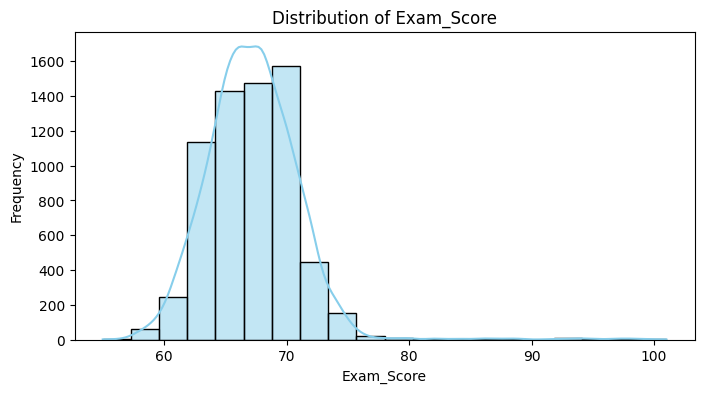

In [18]:
# Visualize the distribution of numerical columns
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

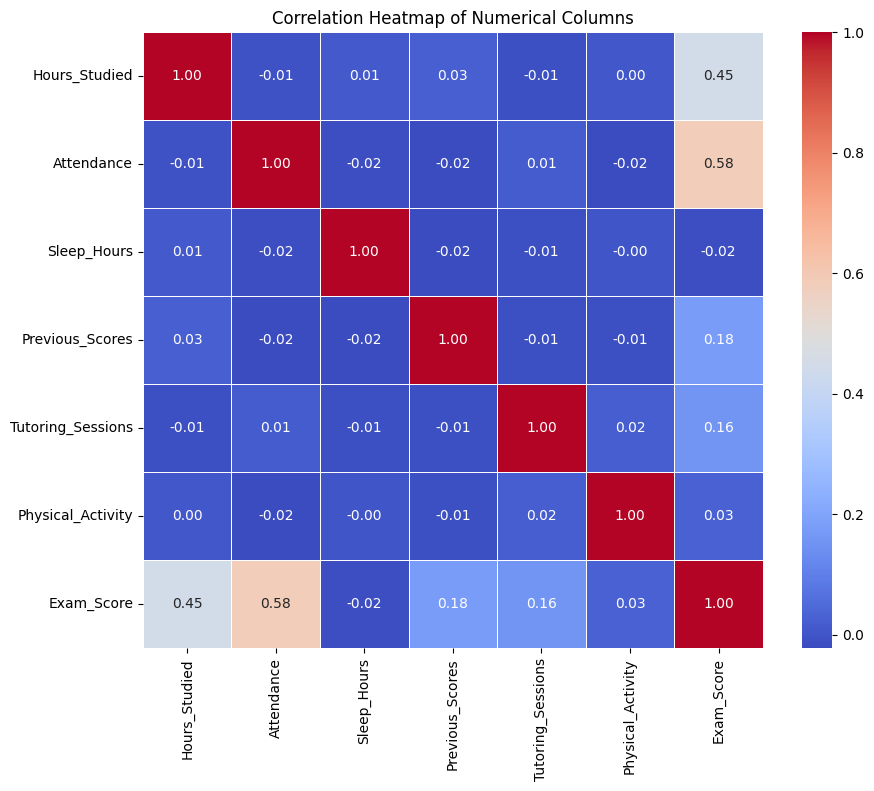

In [20]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [33]:
# Analyze categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(df[col], palette='viridis', order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

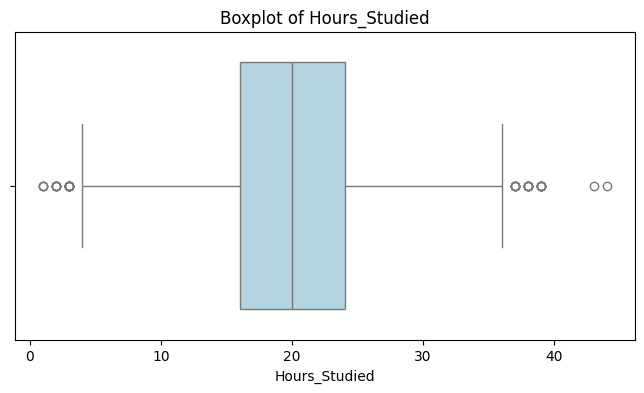

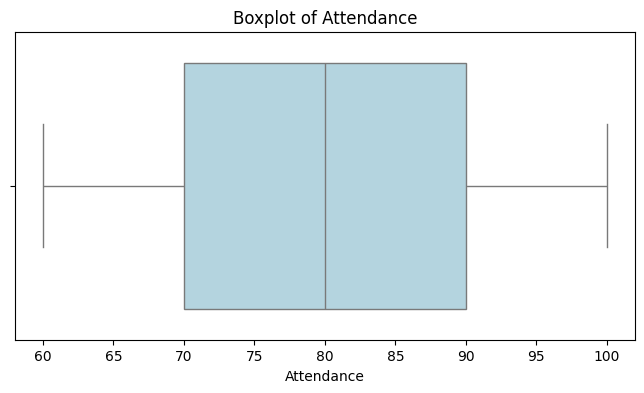

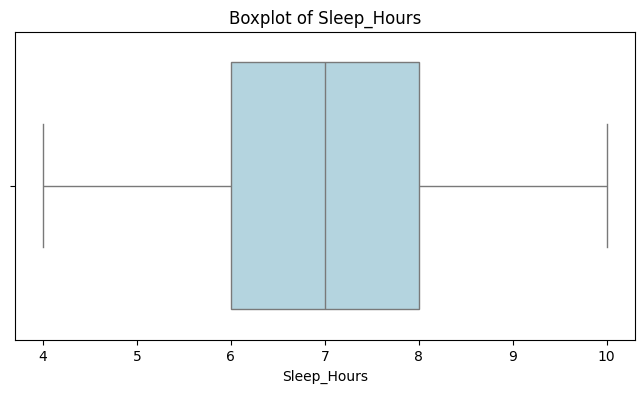

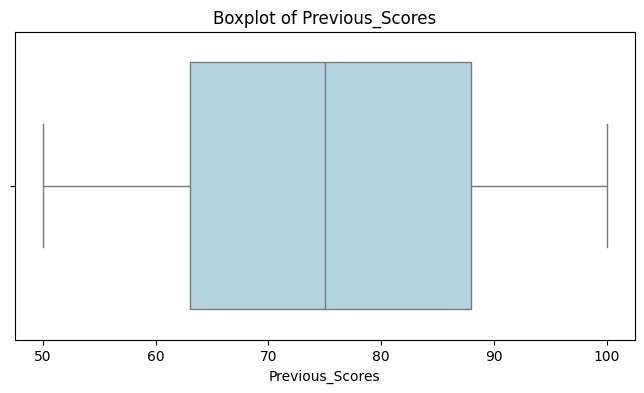

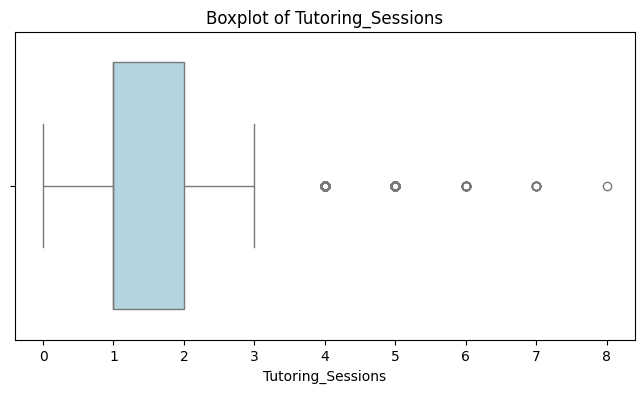

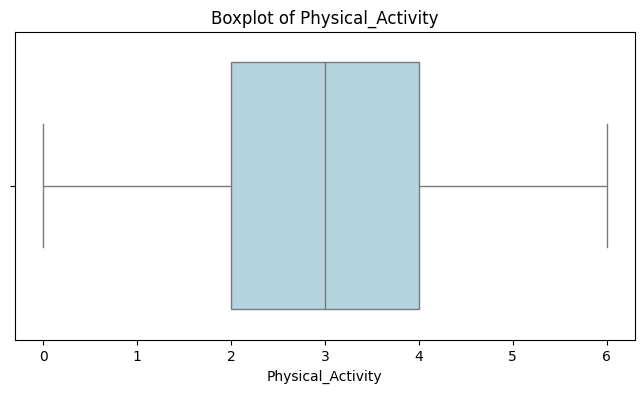

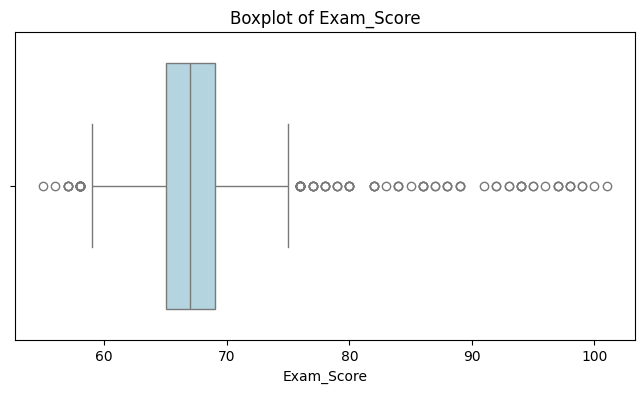

In [34]:
# Boxplot to detect outliers in numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

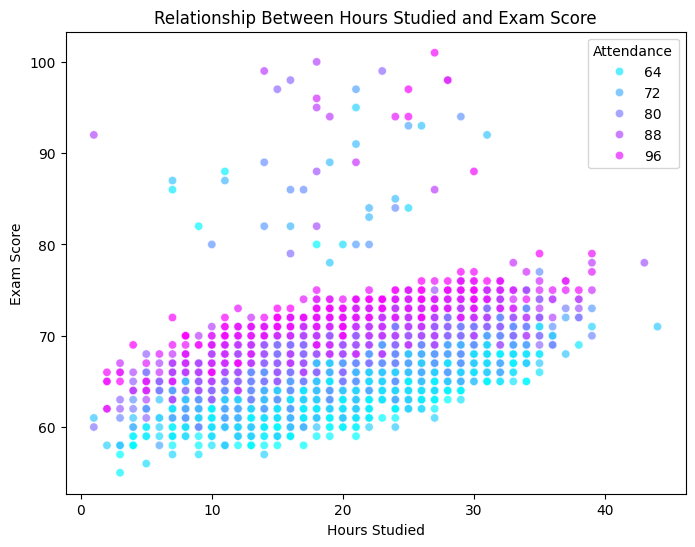

In [35]:
# Relationship Between Hours_Studied and Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', hue='Attendance', palette='cool', alpha=0.7)
plt.title("Relationship Between Hours Studied and Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

<ipython-input-36-b0fa382cc3e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tutoring_Sessions', y='Exam_Score', palette='pastel')


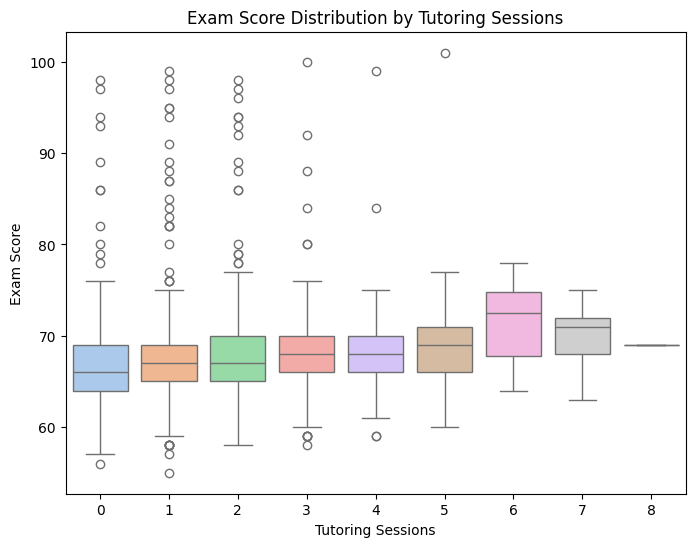

In [36]:
# Exam Score Distribution by Tutoring Sessions
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Tutoring_Sessions', y='Exam_Score', palette='pastel')
plt.title("Exam Score Distribution by Tutoring Sessions")
plt.xlabel("Tutoring Sessions")
plt.ylabel("Exam Score")
plt.show()

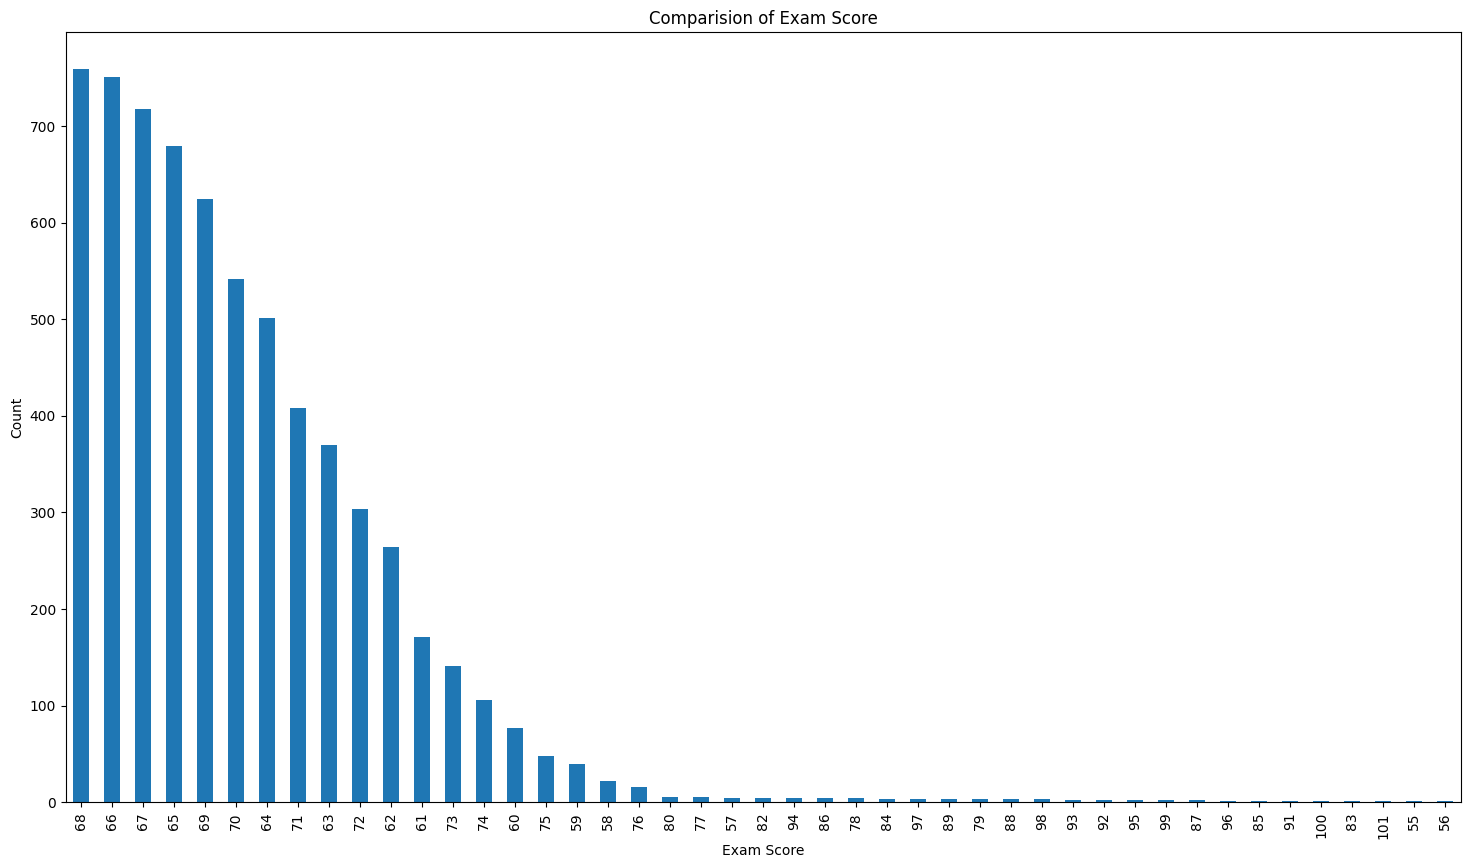

In [38]:
plt.subplots(figsize=(15,5))

df['Exam_Score'].value_counts(normalize=True)
df['Exam_Score'].value_counts(dropna=False).plot.bar(figsize = (18,10))
plt.title('Comparision of Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

**Summary of insights:**


*   Hours_Studied has a positive correlation with Exam_Score.
*   Attendance and Exam_Score are moderately correlated.

*   Tutoring Sessions show varying impacts on Exam Scores.





# **Explanatory Analysis**

# **1. Which Factors Have the Strongest Correlation with Exam Scores?**

Step Method:


*   Calculate the correlation between numeric columns and
Exam_Score.
*   Select the factor with the highest correlation.

*   Visualize the correlation using a bar chart.

Correlation with Exam Score:
Attendance           0.580994
Hours_Studied        0.445400
Previous_Scores      0.175391
Tutoring_Sessions    0.156357
Physical_Activity    0.027832
Sleep_Hours         -0.016915
Name: Exam_Score, dtype: float64


<ipython-input-39-e9f026da7d16>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exam_score_corr.index, y=exam_score_corr.values, palette="viridis")


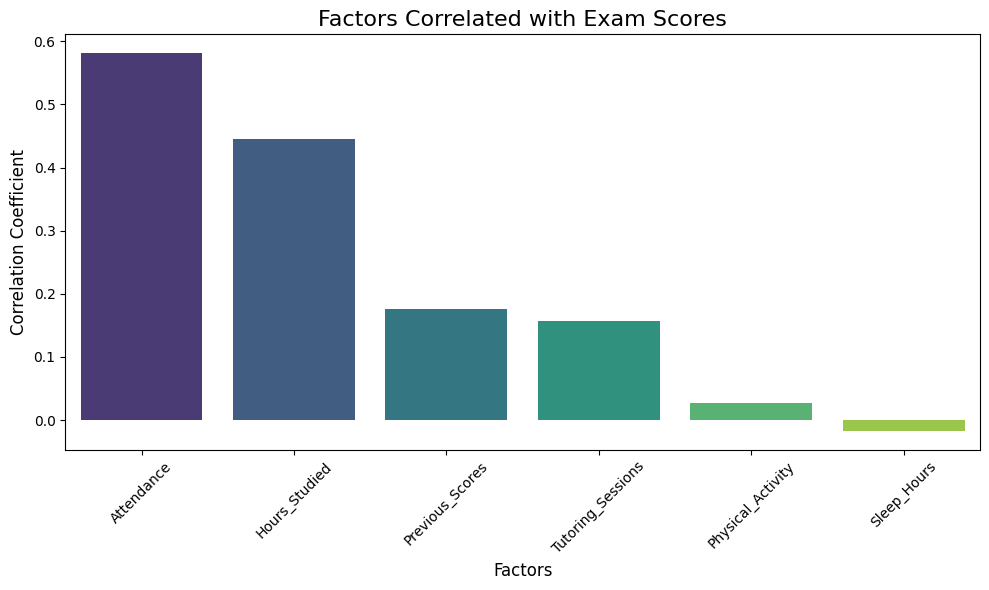

In [39]:
# Menghitung korelasi
correlation = df.corr()
exam_score_corr = correlation["Exam_Score"].drop("Exam_Score").sort_values(ascending=False)

# Menampilkan hasil korelasi
print("Correlation with Exam Score:")
print(exam_score_corr)

# Visualisasi faktor dengan korelasi tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(x=exam_score_corr.index, y=exam_score_corr.values, palette="viridis")
plt.title("Factors Correlated with Exam Scores", fontsize=16)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.xlabel("Factors", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This graph shows **how important each factor** is in predicting the exam score.

- **Attendance** and **Hours_Studied** are the most influential factors.
- Other factors such as **Previous_Scores** also play an important role but have a smaller impact.
- Factors such as **Physical_Activity**, **Tutoring_Sessions**, and **Sleep_Hours** have a small impact.

So, the model assesses that **attendance and hours studied** have the largest impact on the final exam score.

# **2. Which group of students achieves the highest average Exam Score based on their study habits and physical activities?**



Step Method:

*   Categorize the data:
Group students into categories based on Hours_Studied and Physical_Activity (e.g., Low, Medium, High).
*   Calculate average scores:
Compute the average Exam_Score for each category combination.

*  Visualize the data








<ipython-input-66-2d4a8a5e56a1>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kelompok_data = df.groupby(['Study_Habits_Level', 'Physical_Activity_Level'])['Exam_Score'].mean().reset_index()



Group with the highest average exam score:
Study_Habits_Level         Excellent
Physical_Activity_Level         Good
Exam_Score                 73.136364
Name: 14, dtype: object


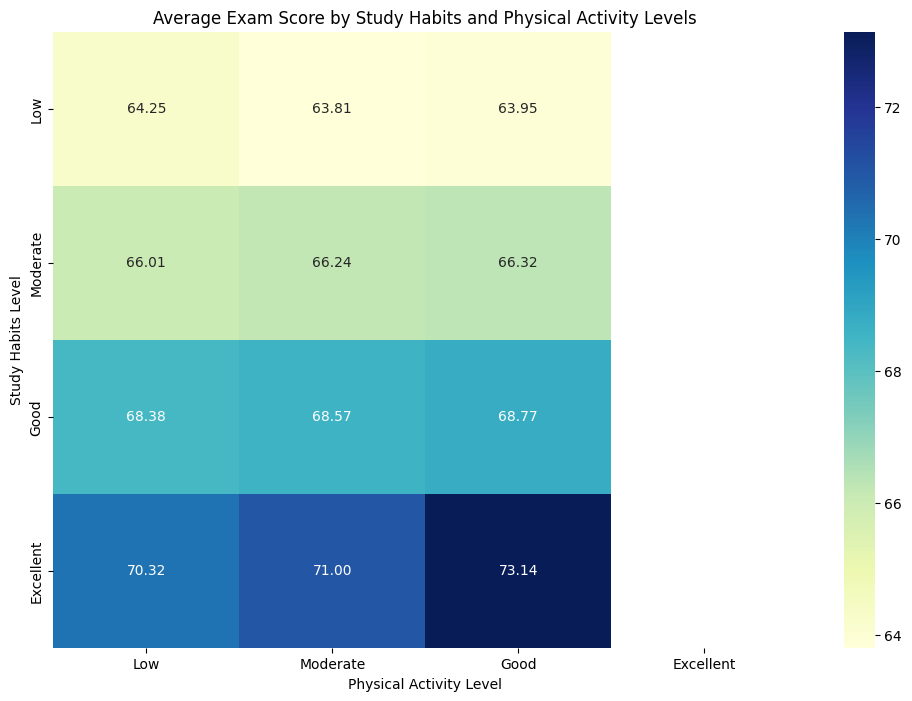


Category explanations:
Hours_Studied:
  0-10: Low
  11-20: Moderate
  21-30: Good
  31-40: Excellent

Physical_Activity (Hours):
  0-2: Low
  3-4: Moderate
  5-6: Good
  7-8: Excellent


In [66]:
# Definisikan fungsi untuk mengkategorikan nilai ke dalam 4 level
def categorize_level(value, bins, labels):
    return pd.cut(value, bins=bins, labels=labels, include_lowest=True)

# Tentukan batas dan label untuk kategori
# Hours_Studied:
#   0-10: Low
#   11-20: Moderate
#   21-30: Good
#   31-40: Excellent
study_bins = [0, 10, 20, 30, 40]
study_labels = ['Low', 'Moderate', 'Good', 'Excellent']

# Physical_Activity:
#   0-2: Low
#   3-4: Moderate
#   5-6: Good
#   7-8: Excellent
activity_bins = [0, 2, 4, 6, 8]
activity_labels = ['Low', 'Moderate', 'Good', 'Excellent']

# Tambahkan kolom kategori ke dataset
df['Study_Habits_Level'] = categorize_level(df['Hours_Studied'], study_bins, study_labels)
df['Physical_Activity_Level'] = categorize_level(df['Physical_Activity'], activity_bins, activity_labels)

# Ubah data menjadi kelompok berdasarkan Study_Habits_Level dan Physical_Activity_Level
# Lalu hitung rata-rata nilai ujian (Exam_Score)
kelompok_data = df.groupby(['Study_Habits_Level', 'Physical_Activity_Level'])['Exam_Score'].mean().reset_index()

# Cari kelompok dengan rata-rata nilai ujian tertinggi
kelompok_terbaik = kelompok_data.loc[kelompok_data['Exam_Score'].idxmax()]

# Tampilkan hasil analisis
print("\nGroup with the highest average exam score:")
print(kelompok_terbaik)

# Visualisasi data
plt.figure(figsize=(12, 8))
sns.heatmap(kelompok_data.pivot(index='Study_Habits_Level', columns='Physical_Activity_Level', values='Exam_Score'), annot=True, fmt=".2f", cmap="YlGnBu") # Corrected line: using keyword arguments for index, columns, and values
plt.title('Average Exam Score by Study Habits and Physical Activity Levels')
plt.xlabel('Physical Activity Level')
plt.ylabel('Study Habits Level')
plt.show()

# Tambahkan keterangan kategori ke output
print("\nCategory explanations:")
print("Hours_Studied:")
print("  0-10: Low")
print("  11-20: Moderate")
print("  21-30: Good")
print("  31-40: Excellent")
print("\nPhysical_Activity (Hours):")
print("  0-2: Low")
print("  3-4: Moderate")
print("  5-6: Good")
print("  7-8: Excellent")



*   Students with Excellent Study Habits and Good or Excellent Physical Activity tend to score the highest.
*   Low Study Habits correlate with lower Exam Scores, regardless of Physical Activity Level.
*   Moderate Physical Activity benefits students across all Study Habit levels.






# **3. What is the distribution of Tutoring Sessions among students with high Exam Scores?**

Step Method:

*   Define high achievers:
Define students with "High Exam Scores" (e.g., scores above 80).
*   Analyze tutoring sessions:
Count or group students based on the number of Tutoring_Sessions they attended.
*   Visualize the data





Distribution of Tutoring Categories:
Tutoring_Category
Low (<2)           3691
Moderate (2-5)     2889
High (6-10)          26
Very High (>10)       0
Name: count, dtype: int64


<ipython-input-50-2d864e48d429>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tutoring_analysis = df.groupby('Tutoring_Category')['Exam_Score'].mean().reset_index()
<ipython-input-50-2d864e48d429>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tutoring_Category', y='Exam_Score', data=tutoring_analysis, palette='viridis')


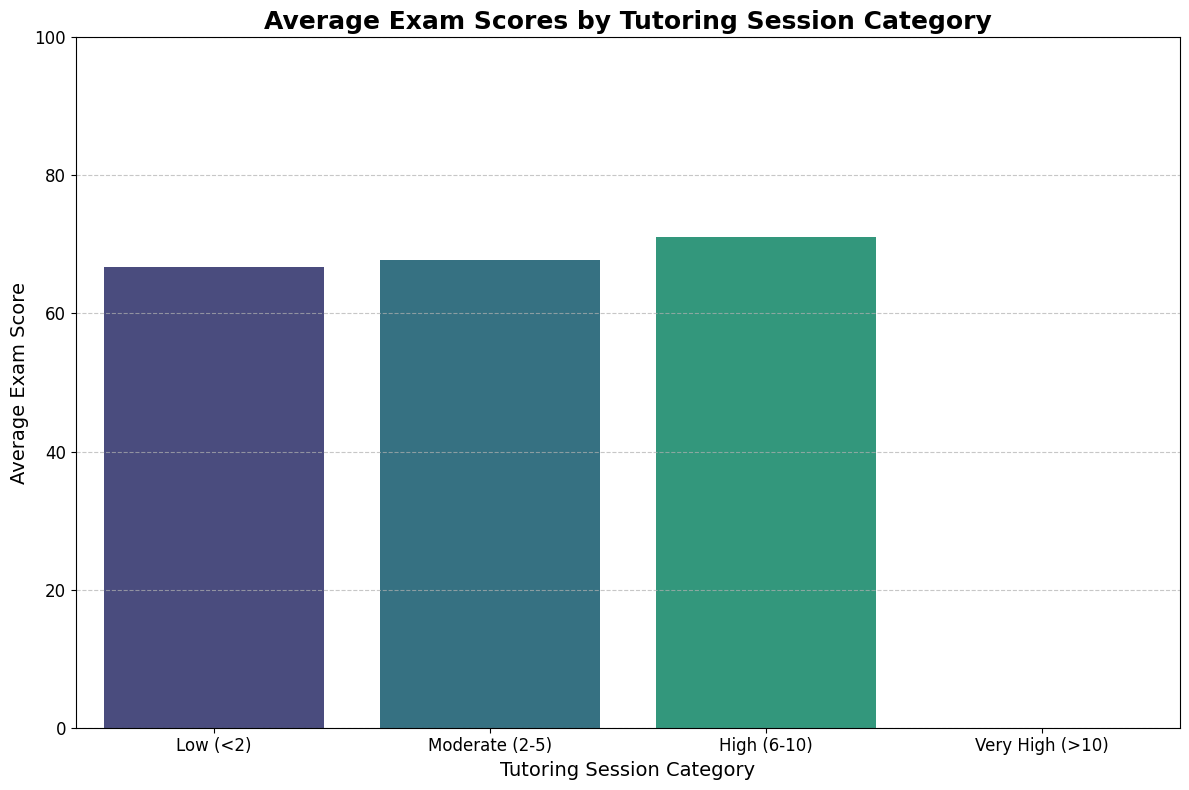

In [50]:
# Create categories for Tutoring Sessions based on quartiles
df['Tutoring_Category'] = pd.cut(df['Tutoring_Sessions'],
                                  bins=[-1, 1, 5, 10, float('inf')],
                                  labels=['Low (<2)', 'Moderate (2-5)', 'High (6-10)', 'Very High (>10)'])

# Verify distribution of categories
category_distribution = df['Tutoring_Category'].value_counts()
print("Distribution of Tutoring Categories:")
print(category_distribution)

# Calculate the average Exam Score for each Tutoring Session category
tutoring_analysis = df.groupby('Tutoring_Category')['Exam_Score'].mean().reset_index()

# Visualize the relationship between Tutoring Sessions and Exam Scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Tutoring_Category', y='Exam_Score', data=tutoring_analysis, palette='viridis')
plt.title('Average Exam Scores by Tutoring Session Category', fontsize=18, fontweight='bold')
plt.ylabel('Average Exam Score', fontsize=14)
plt.xlabel('Tutoring Session Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  # Ensure consistent y-axis range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



*   No students attended more than 10 tutoring sessions. Consider adjusting bin categories or data collection.
*   Students attending 'High (6-10)' and 'Very High (>10)' tutoring sessions tend to perform better.

*   However, improvement between 'High' and 'Very High' is less significant, showing possible diminishing returns.





# **4. What is the percentage of students categorized as passing and failing?**

Step Method


*   Define Passing and Failing Criteria
*   Calculate Percentages:
Count the number of students in each category (Pass/Fail), divide the count by the total number of students to get the percentage.
*   Visualize the Results






Percentage of students passing and failing:
Pass/Fail
Fail    75.40115
Pass    24.59885
Name: count, dtype: float64


<ipython-input-70-95224f35d5a7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pass_fail_percentages.index, y=pass_fail_percentages.values, palette=["#ffcccb", "#90ee90"])


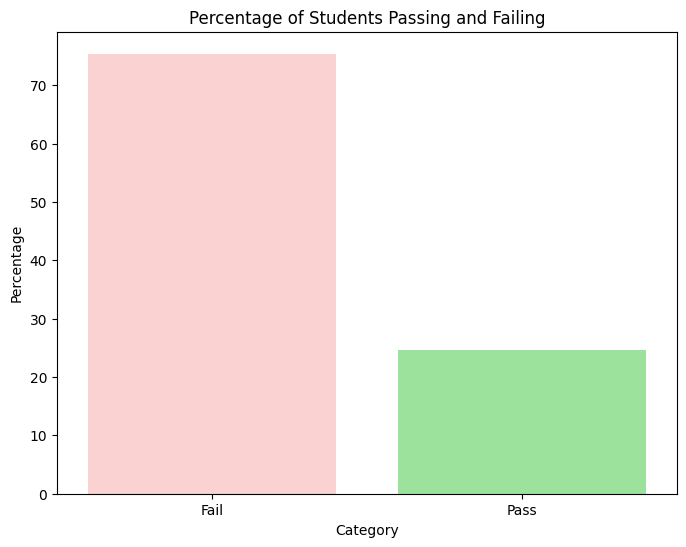

In [70]:
# Calculate the percentage of students passing and failing
passing_score = 70
df['Pass/Fail'] = df['Exam_Score'].apply(lambda x: 'Pass' if x >= passing_score else 'Fail')
pass_fail_counts = df['Pass/Fail'].value_counts()
pass_fail_percentages = (pass_fail_counts / len(df)) * 100

# Display the results
print("\nPercentage of students passing and failing:")
print(pass_fail_percentages)

# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=pass_fail_percentages.index, y=pass_fail_percentages.values, palette=["#ffcccb", "#90ee90"])
plt.title('Percentage of Students Passing and Failing')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

Based on the graph above, the number of students predicted to fail is much higher than those who pass. This indicates that **most of the predicted scores are below the passing threshold I assumed, which is 70.**

This distribution may reflect a pattern in the data that tends to have lower scores, or the model tends to be more strict in classifying students as passing. Further checking is needed to see if these predictions are consistent with the actual labels, to ensure the accuracy and effectiveness of the model.

# **Conclusion**

The analysis highlights key factors driving academic success. Strong study habits and balanced physical activity were found to significantly boost exam scores, with students excelling in both achieving the highest averages. Tutoring sessions also proved valuable, showing a positive trend among high-achievers. Lastly, the pass/fail analysis revealed a clear picture of overall performance, emphasizing the need for targeted support to help more students succeed.